# Edge gradient

This jnb explores the possibilities of colouring edges with a gradient in graph tools.
The hope is that it may be useful for very long endges when completelly zommed in.

In [1]:
import cugraph
import cudf
import pandas as pd
import numpy as np
import math
from graph_tool.all import *

### Test graph generation

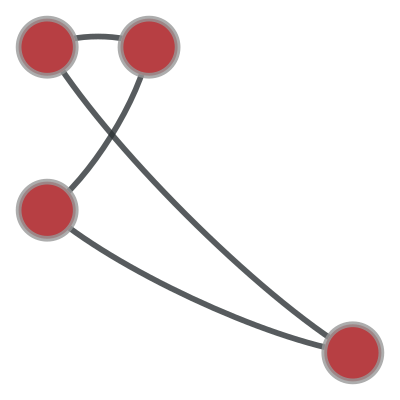

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe929c53880, at 0x7fe93242daf0>

In [7]:
g = Graph()
g.add_vertex(4)
pos = g.new_vertex_property('vector<float>')
pos[g.vertex(0)] = [0, 0]
pos[g.vertex(1)] = [0, 8]
pos[g.vertex(2)] = [5, 0]
pos[g.vertex(3)] = [15, 15]
g.add_edge(g.vertex(0), g.vertex(3))
g.add_edge(g.vertex(1), g.vertex(2))
g.add_edge(g.vertex(1), g.vertex(3))
g.add_edge(g.vertex(2), g.vertex(0))

g.vertex_properties['pos'] = pos
ctl = g.new_edge_property('vector<float>')
angle = 1 # negative is clockwise
for e in g.edges():
    ctl[e] = [0,0,  0.25,angle,  0.75,angle,  1,0]

Xs = list(pos.get_2d_array([0])[0])
Ys = list(pos.get_2d_array([1])[0])
    
for v in g.vertices():
    for e in v.out_edges():
        s = e.source()
        t = e.target()
        s_pos = (Xs[int(s)], Ys[int(s)])
        t_pos = (Xs[int(t)], Ys[int(t)])
        d = math.dist(s_pos, t_pos)
        ctl[e] = [0,0,  0.25,math.log10(d),  0.75,math.log10(d),  1,0]
        
graph_draw(g, 
           pos=g.vp.pos, edge_control_points=ctl, 
           output_size=[200,200], 
           edge_end_marker="none")

### GRADIENT
Edge gradient is an array of at least 10 numbers, the first 5 refer to the edge source, the last 5 refer to the edge target.

One of those 5 numbers tuple is composed as follows: 
offset, a value from 0 to 1, it indicates where the edge will become **completely** of the color specified. 
r,g,b,a: floats from 0 to 1 

(0, 3)
(1, 2)
(1, 3)
(2, 0)


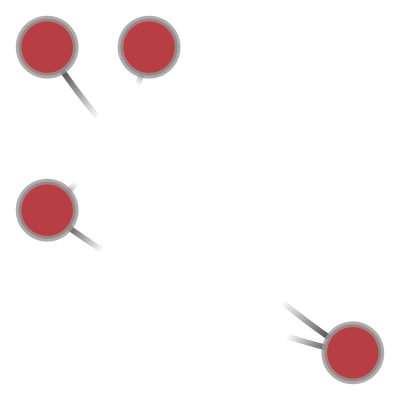

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe929c53880, at 0x7fe93242daf0>

In [27]:
alpha = 0.2
#              o  r  g  b  a 
edge_gradient=[0, 0, 0, 0, 1, 
               alpha, 0, 0, 0, 0,
               1 - alpha, 0, 0, 0, 0,
               1, 0, 0, 0, 1]

egradient = g.new_edge_property('vector<float>')
for e in g.edges():
    print(e)
    egradient[e] = edge_gradient
    
graph_draw(g, 
           pos=g.vp.pos, edge_control_points=ctl, 
           output_size=[200,200], 
           edge_end_marker="none",
            edge_gradient=egradient)

### 3 fade points

(0, 3)
(1, 2)
(1, 3)
(2, 0)


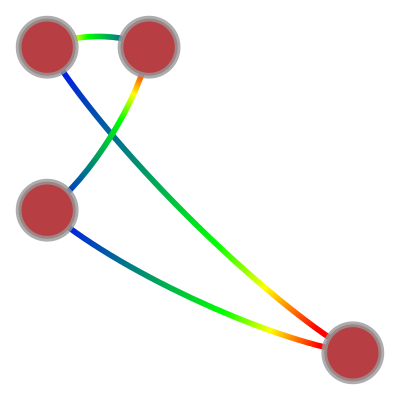

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe929c53880, at 0x7fe93242daf0>

In [11]:
#              o  r  g  b  a 
edge_gradient=[0,   0, 0, 1, 1, 
               0.6, 0, 1, 0, 1,
               0.75, 1, 1, 0, 1,
               0.9,   1, 0, 0, 1]
egradient = g.new_edge_property('vector<float>')
for e in g.edges():
    print(e)
    egradient[e] = edge_gradient
    
graph_draw(g, 
           pos=g.vp.pos, edge_control_points=ctl, 
           output_size=[200,200], 
           edge_end_marker="none",
            edge_gradient=egradient)